In [1]:
#Import the required lib
import os
import numpy as np
import pandas as pd 
from utils import pct_change, preprocess_and_split_df, convert_to_dataset, data_preparation, plot_data, create_bollinger_limits
import matplotlib.pyplot as plt
plt.style.use('seaborn')


import warnings
warnings.filterwarnings('ignore')

## Data upload to dictionary ##

In [4]:
# Create crypto code and slice index dict, will also hold the datafrmaes after upload
CRYPTO_DICT = { 
            "ADA": {"split_ind": 650000,
                     "df": []}, 
            "BCH": {"split_ind": 10000,
                     "df": []},
            "BNB": {"split_ind": 750000,
                     "df": []}, 
            "BTC": {"split_ind": 700000,
                     "df": []},
            "ETH": {"split_ind": 780000,
                     "df": []},
            "LTC": {"split_ind": 750000,
                     "df": []}, 
            "NEO": {"split_ind": 800000,
                     "df": []},
            "TRX": {"split_ind": 860000,
                     "df": []},
            "XRP": {"split_ind": 850000,
                     "df": []},
}

# Original data dir 
ORIGINAL_DIR = "original_data/"

# Dir to save to new prepared data
NEW_DIR = "Training_Data/"

ADA start processing


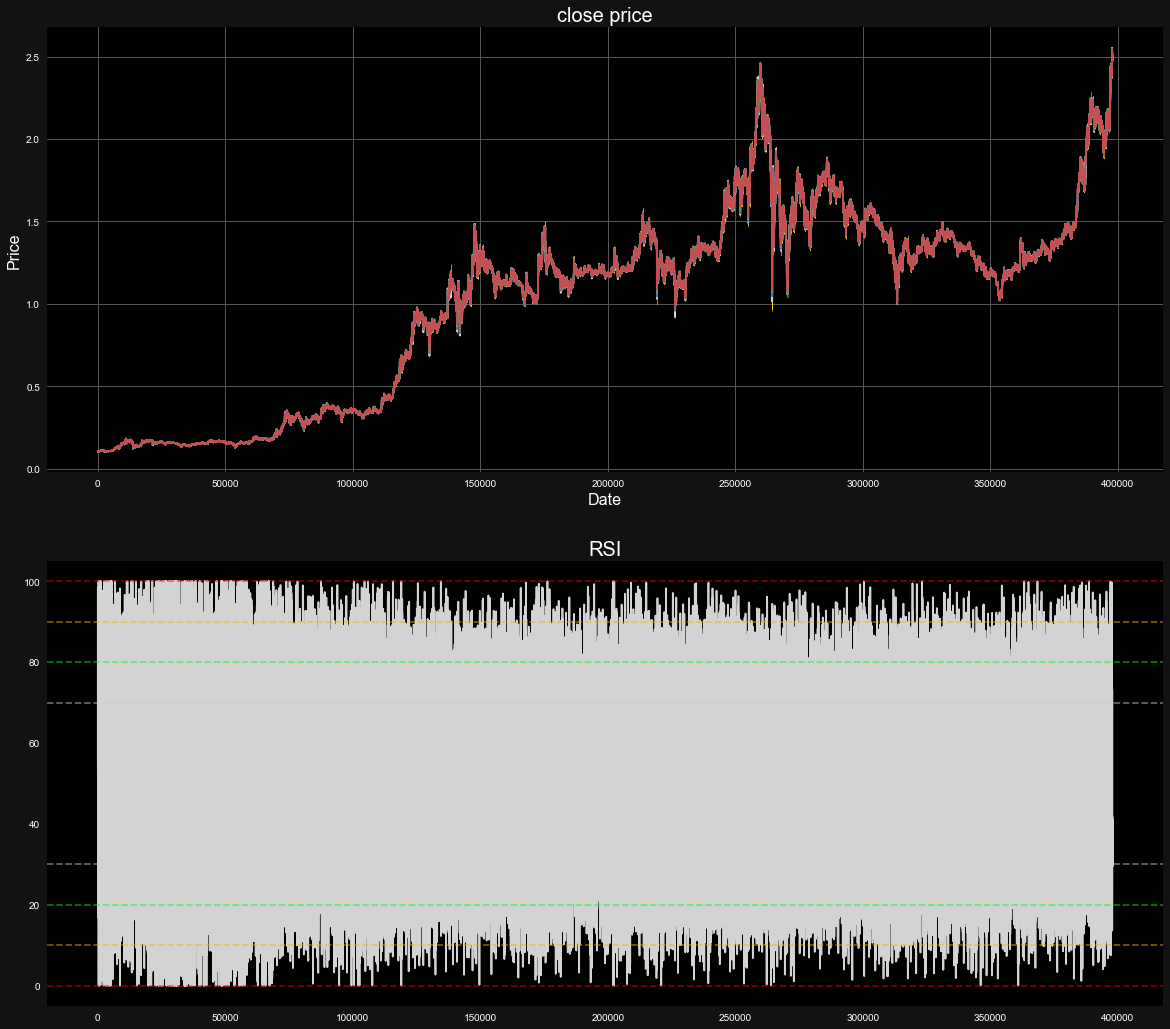

ADA processing is over.
BCH start processing


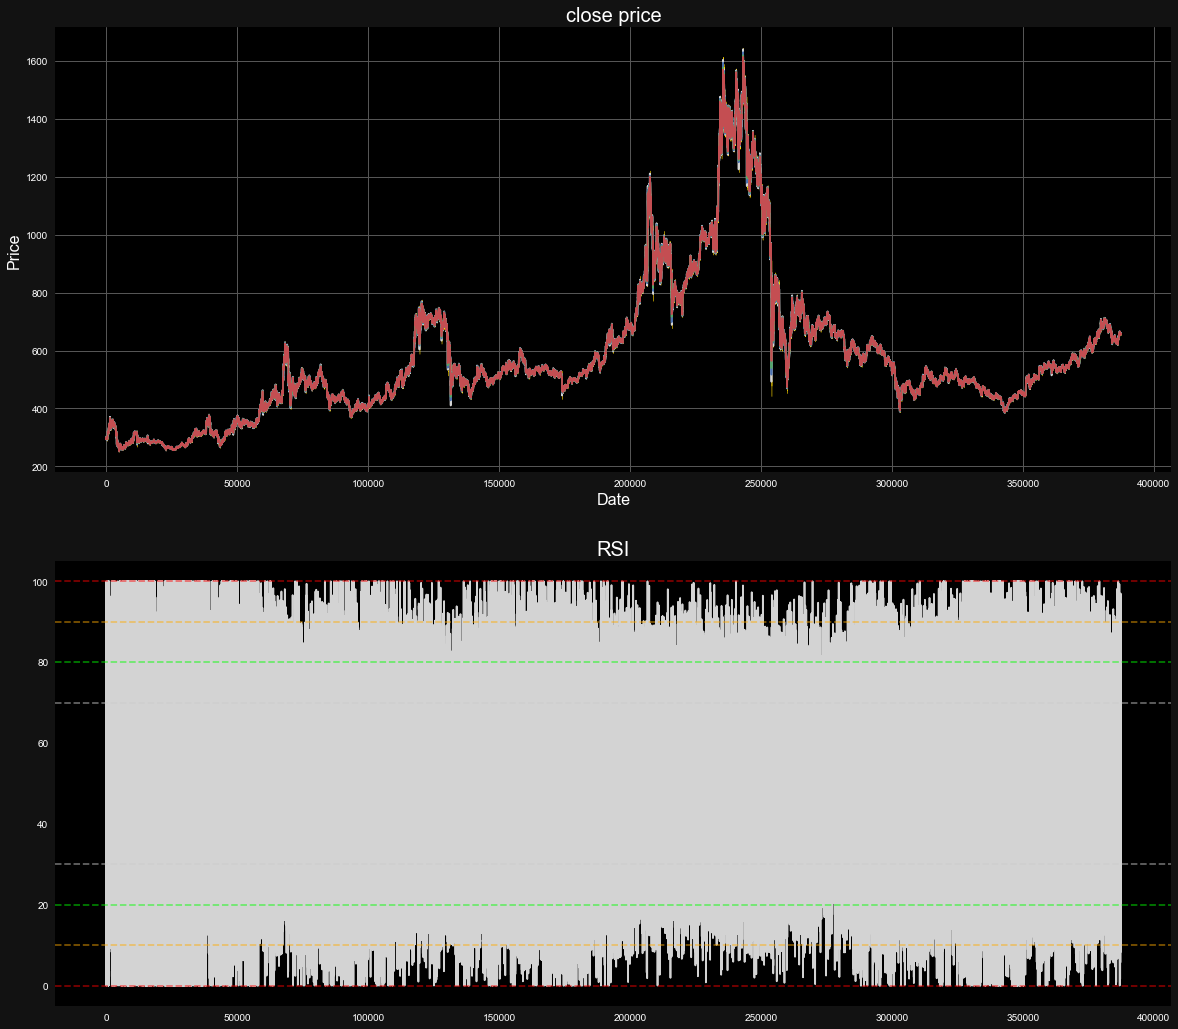

BCH processing is over.
BNB start processing


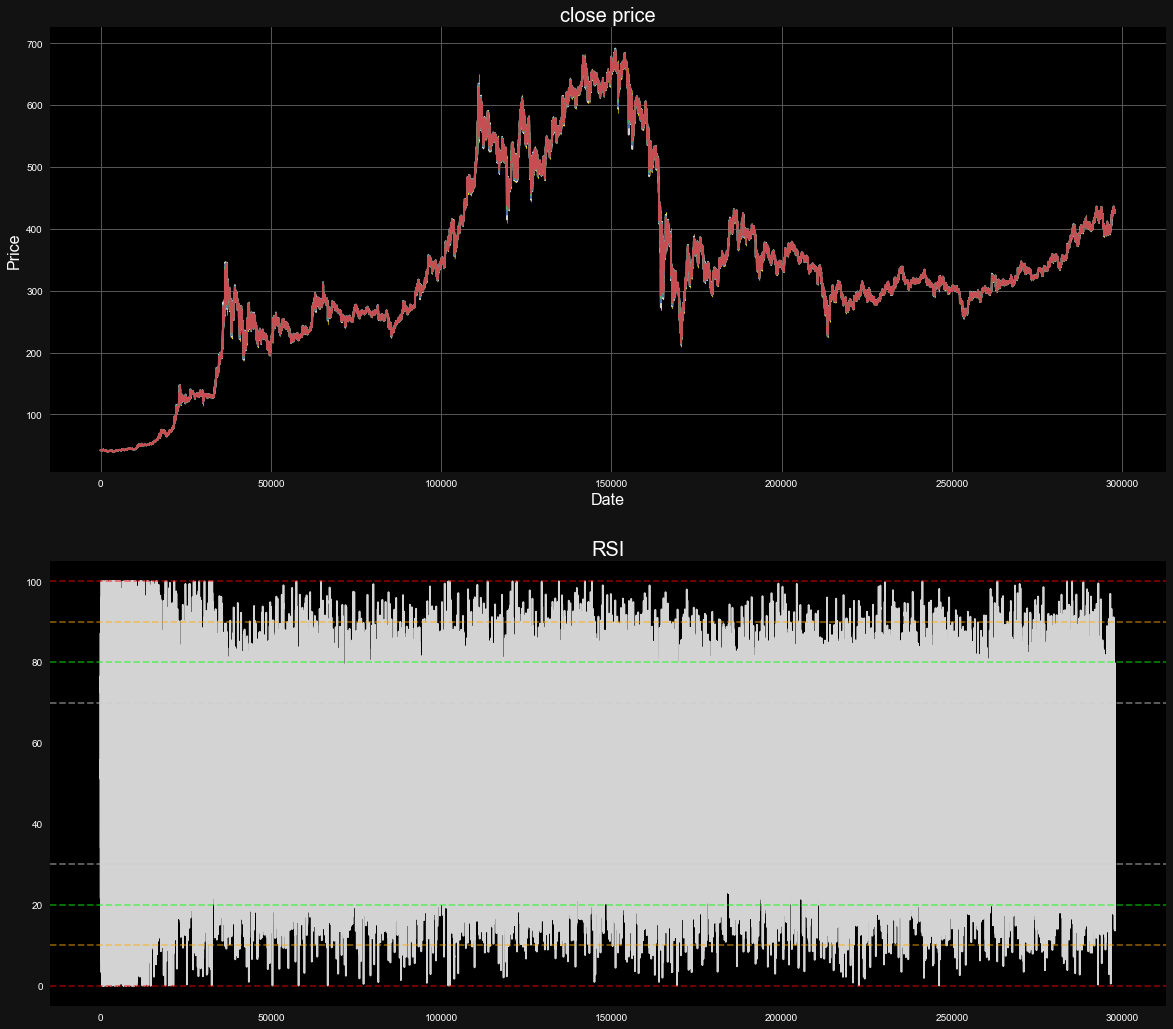

BNB processing is over.
BTC start processing


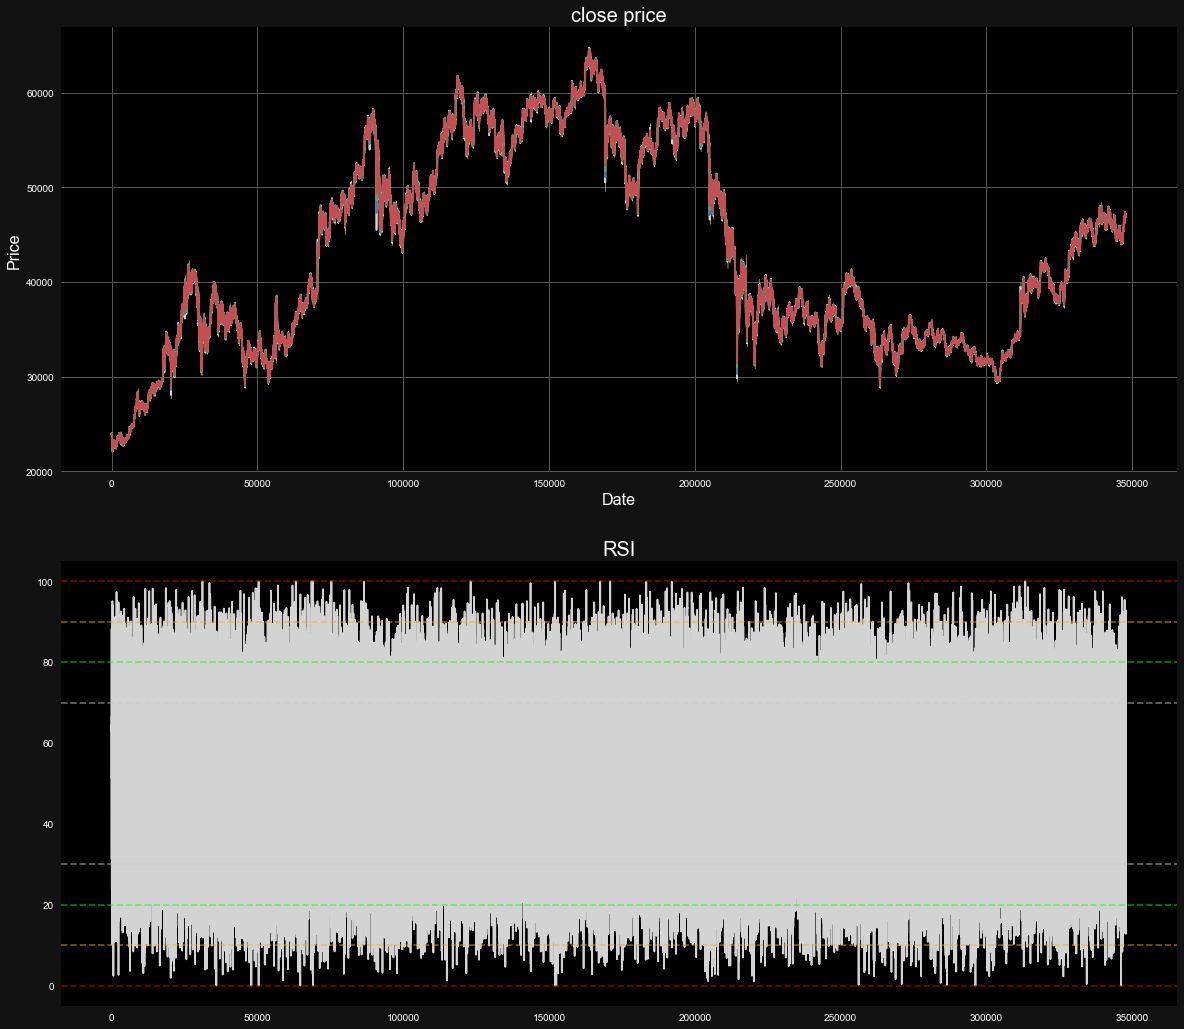

BTC processing is over.
ETH start processing


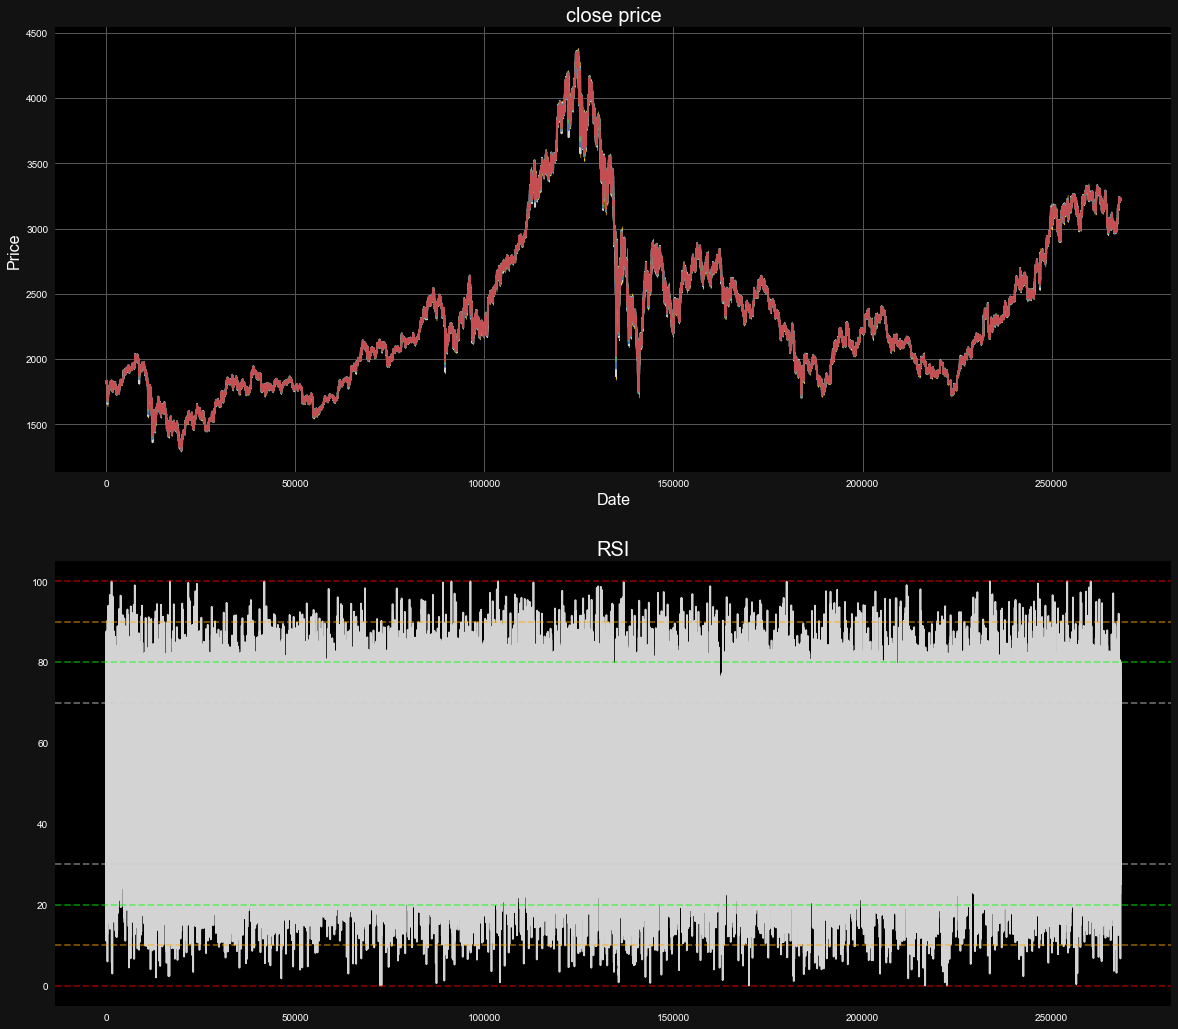

ETH processing is over.
LTC start processing


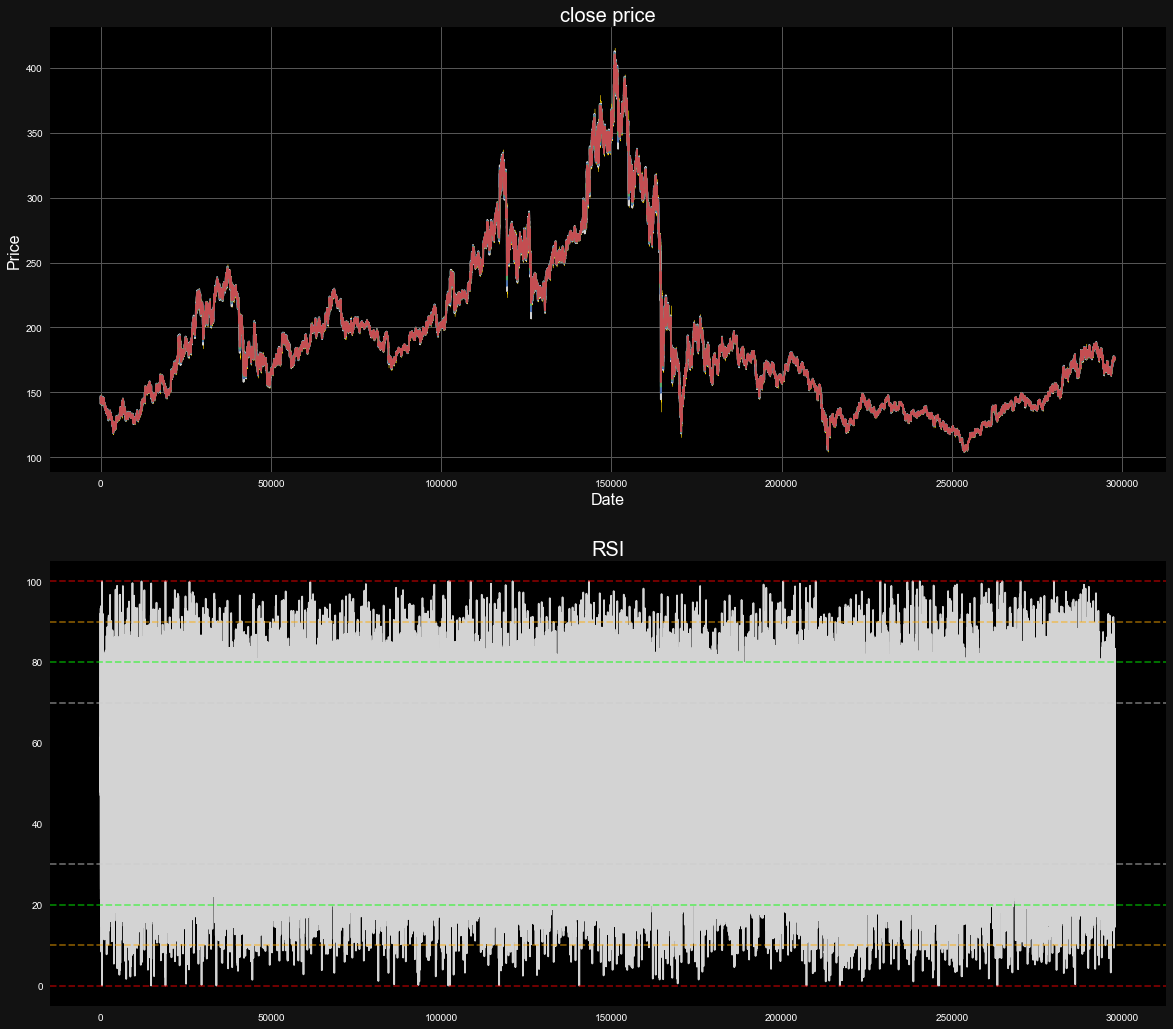

LTC processing is over.
NEO start processing


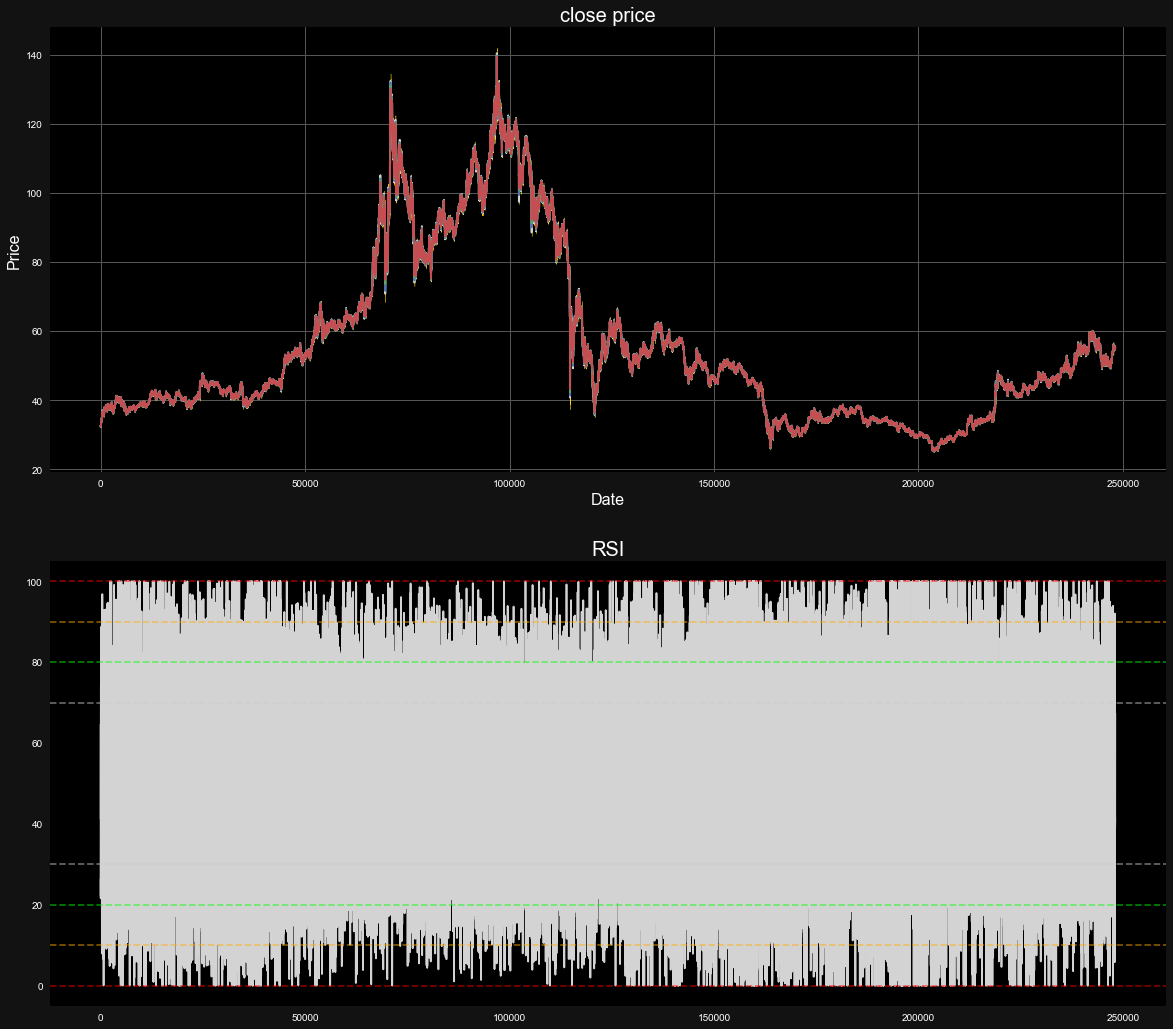

NEO processing is over.
TRX start processing


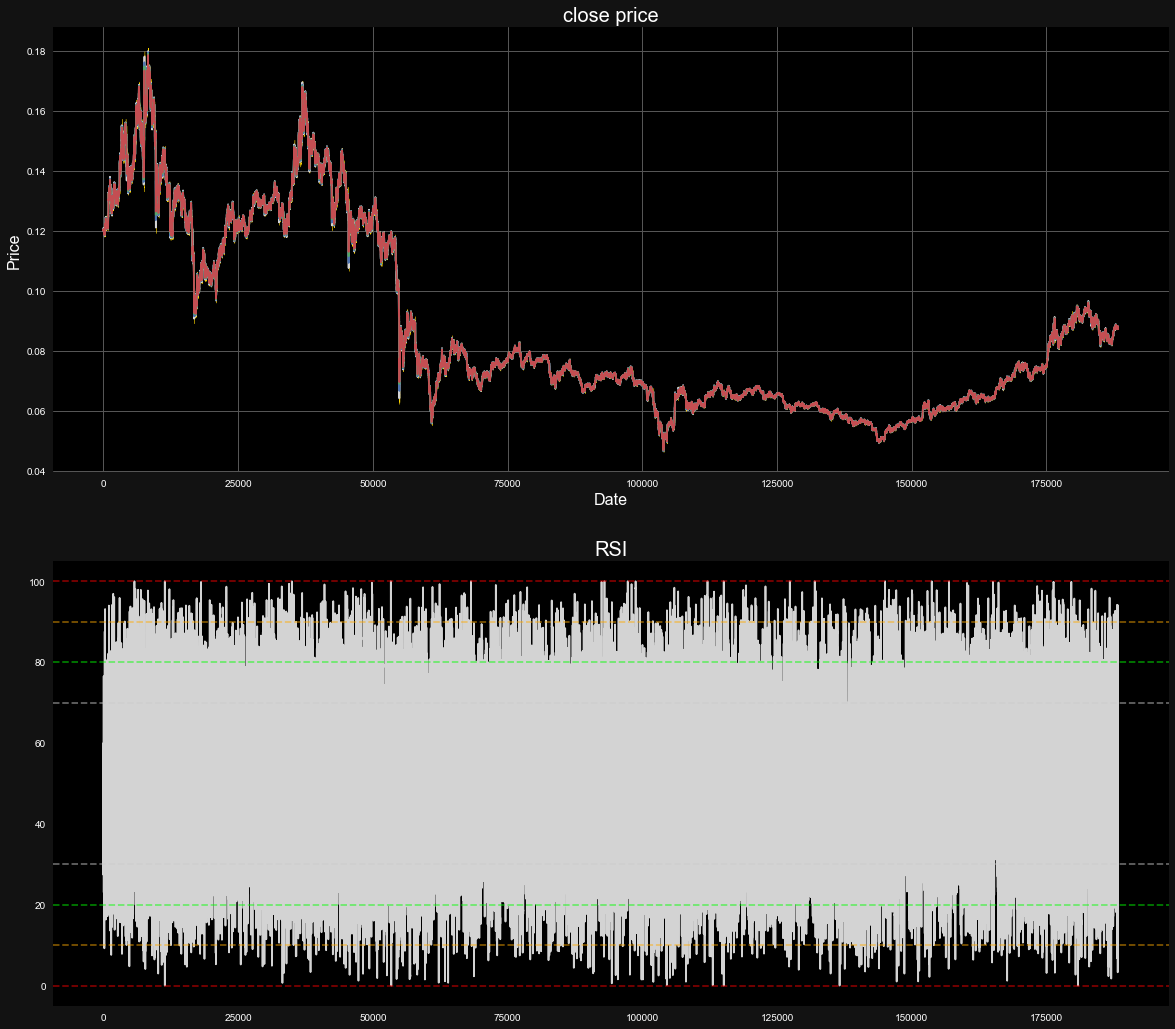

TRX processing is over.
XRP start processing


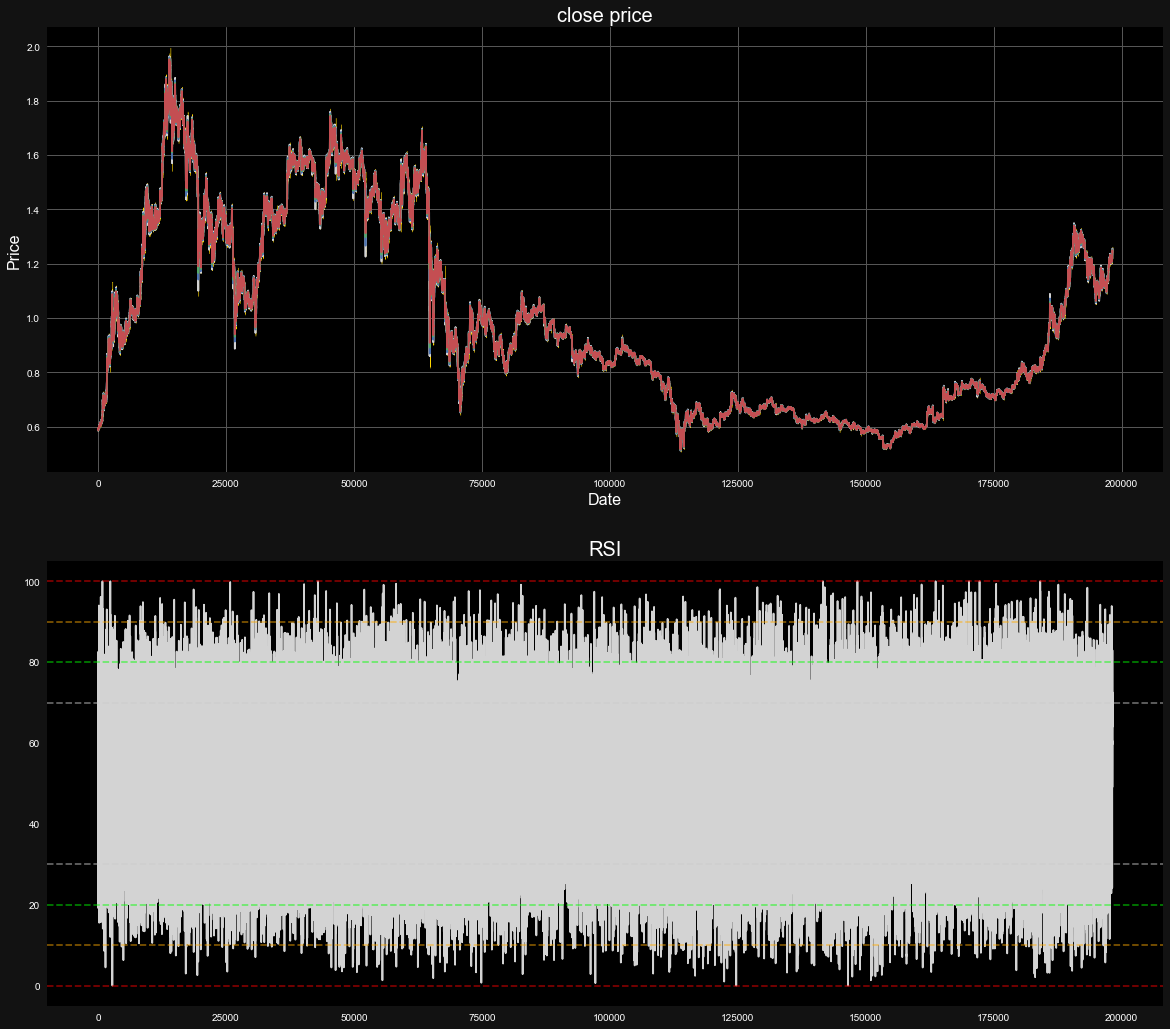

XRP processing is over.


In [7]:
# This for loop will go through all coins used in the training later. 
# using the data taken from kucoin service. The function data_preparation will compute EMA values, mid_price, RSI, future price and future change
# the code will return a dataframe to be saved into pkl format and load to the data dict
for Crypto_code in CRYPTO_DICT:
    print(f"{Crypto_code} start processing")
    df = data_preparation(os.path.join("original_data/", f"Kucoin_{Crypto_code}USDT_minute.xlsx"), slice_ind=CRYPTO_DICT[Crypto_code]["split_ind"], columns_drop_list=["open", "high", "low", f"Volume {Crypto_code}"])
    plot_data(df)
    df.to_pickle(f"Training_data/Data_prepared/{Crypto_code}-data-toPreprocess.pkl")
    CRYPTO_DICT[Crypto_code]["df"] = df
    print(f"{Crypto_code} processing is over.")

In [8]:
# we can see that all the data has been saved to pkl format
os.listdir("Training_Data/Data_prepared")

['ADA-data-toPreprocess.pkl',
 'BCH-data-toPreprocess.pkl',
 'BNB-data-toPreprocess.pkl',
 'BTC-data-toPreprocess.pkl',
 'ETH-data-toPreprocess.pkl',
 'LTC-data-toPreprocess.pkl',
 'NEO-data-toPreprocess.pkl',
 'TRX-data-toPreprocess.pkl',
 'XRP-data-toPreprocess.pkl']

## Checkpoint Load prepared data ##

In [2]:
# upload the data to the data dict
CRYPTO_DICT = { 
            "ADA": {"split_ind": 650000,
                     "df": []}, 
            "BCH": {"split_ind": 10000,
                     "df": []},
            "BNB": {"split_ind": 750000,
                     "df": []}, 
            "BTC": {"split_ind": 700000,
                     "df": []},
            "ETH": {"split_ind": 780000,
                     "df": []},
            "LTC": {"split_ind": 750000,
                     "df": []}, 
            "NEO": {"split_ind": 800000,
                     "df": []},
            "TRX": {"split_ind": 860000,
                     "df": []},
            "XRP": {"split_ind": 850000,
                     "df": []},
}
for Crypto_code in CRYPTO_DICT:
    CRYPTO_DICT[Crypto_code]["df"]  = pd.read_pickle(f"Training_data/Data_prepared/{Crypto_code}-data-toPreprocess.pkl")

## Data_Preprocessing ##

In [3]:
# view the columns of one dataframe (BTC)
CRYPTO_DICT["BTC"]["df"].head(3)

,unix,date,symbol,close,Volume USDT,mid_price_1,mid_price_2,EMA0,EMA1,EMA2,RSI,SMA,upper,lower,future_price,future_change
0,1608533520,12/21/2020,BTC/USDT,23866.6,7010.135051,23865.15,23867.70,23866.642001,23862.796648,23886.173649,62.982196,23842.845,23873.813743,23811.876257,23865.1,0
1,1608533580,12/21/2020,BTC/USDT,23866.6,7825.243282,23865.00,23865.00,23865.871001,23875.026177,23893.938919,66.070039,23844.460,23876.886980,23812.033020,23859.1,0
2,1608533640,12/21/2020,BTC/USDT,23867.2,6516.577492,23864.75,23866.85,23862.485500,23887.847270,23905.331135,67.322835,23846.220,23879.606326,23812.833674,23862.8,0


In [4]:
# create 2 new columns for upper and lower limits 
for Crypto_code in CRYPTO_DICT:
    CRYPTO_DICT[Crypto_code]["df"]["upper_check"], CRYPTO_DICT[Crypto_code]["df"]["lower_check"] = create_bollinger_limits(CRYPTO_DICT[Crypto_code]["df"])

In [5]:
CRYPTO_DICT["BTC"]["df"].sample(5)

,unix,date,symbol,close,Volume USDT,mid_price_1,mid_price_2,EMA0,EMA1,EMA2,RSI,SMA,upper,lower,future_price,future_change,upper_check,lower_check
38778,1610860200,01/17/2021,BTC/USDT,35777.8,64832.115611,35770.15,35789.45,35769.731785,35793.435070,35768.961629,42.733102,35844.165,35990.148738,35698.181262,35736.1,0,0,1
250650,1623597720,06/13/2021,BTC/USDT,35850,95145.547480,35860.65,35854.65,35847.957716,35854.644977,35844.625310,37.946903,35897.460,35953.375629,35841.544371,35825.3,0,0,1
280618,1625395800,07/04/2021,BTC/USDT,35543.7,3668.841647,35539.95,35539.95,35555.827664,35573.790143,35580.543562,53.268428,35532.830,35565.653812,35500.006188,35564.7,1,1,0
44478,1611202200,01/21/2021,BTC/USDT,34688.7,56138.693349,34720.90,34696.20,34675.700794,34692.131979,34691.525219,56.580386,34634.130,34822.835542,34445.424458,34679.8,0,1,0
222141,1621887180,05/24/2021,BTC/USDT,39467,245084.466904,39499.55,39484.15,39412.813415,39250.367126,39258.930796,41.355587,39583.295,39774.851830,39391.738170,39269.5,0,0,1


### 1. Data to pct_change() ###

In [6]:
# view the columns of one dataframe (BTC)
CRYPTO_DICT["BTC"]["df"]

,unix,date,symbol,close,Volume USDT,mid_price_1,mid_price_2,EMA0,EMA1,EMA2,RSI,SMA,upper,lower,future_price,future_change,upper_check,lower_check
0,1608533520,12/21/2020,BTC/USDT,23866.6,7010.135051,23865.15,23867.70,23866.642001,23862.796648,23886.173649,62.982196,23842.845,23873.813743,23811.876257,23865.1,0,1,0
1,1608533580,12/21/2020,BTC/USDT,23866.6,7825.243282,23865.00,23865.00,23865.871001,23875.026177,23893.938919,66.070039,23844.460,23876.886980,23812.033020,23859.1,0,1,0
2,1608533640,12/21/2020,BTC/USDT,23867.2,6516.577492,23864.75,23866.85,23862.485500,23887.847270,23905.331135,67.322835,23846.220,23879.606326,23812.833674,23862.8,0,1,0
3,1608533700,12/21/2020,BTC/USDT,23865.1,5818.226428,23867.80,23867.80,23862.642750,23894.319478,23916.584908,60.756076,23848.020,23881.401785,23814.638215,23905.6,1,1,0
4,1608533760,12/21/2020,BTC/USDT,23859.1,6398.749225,23864.20,23862.15,23884.121375,23903.085342,23927.187927,52.716873,23849.505,23882.030583,23816.979417,23919.9,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347897,1629444420,08/20/2021,BTC/USDT,47085.1,133184.447056,47090.80,47086.90,47057.775894,47029.444027,47001.746445,50.584958,47108.075,47157.551455,47058.598545,47020,0,0,1
347898,1629444480,08/20/2021,BTC/USDT,47041.7,132977.591814,47063.35,47063.35,47038.887947,47019.345734,46980.977156,44.861660,47102.685,47156.460726,47048.909274,47003.4,0,0,1
347899,1629444540,08/20/2021,BTC/USDT,47050.4,180183.705695,47046.90,47046.05,47021.143973,47001.332667,46965.861725,37.513998,47099.395,47157.561314,47041.228686,46999,0,0,1
347900,1629444600,08/20/2021,BTC/USDT,47020,126677.583573,47042.25,47035.20,47010.071987,46982.066191,46947.949380,30.049261,47094.560,47162.005617,47027.114383,46994.1,0,0,1


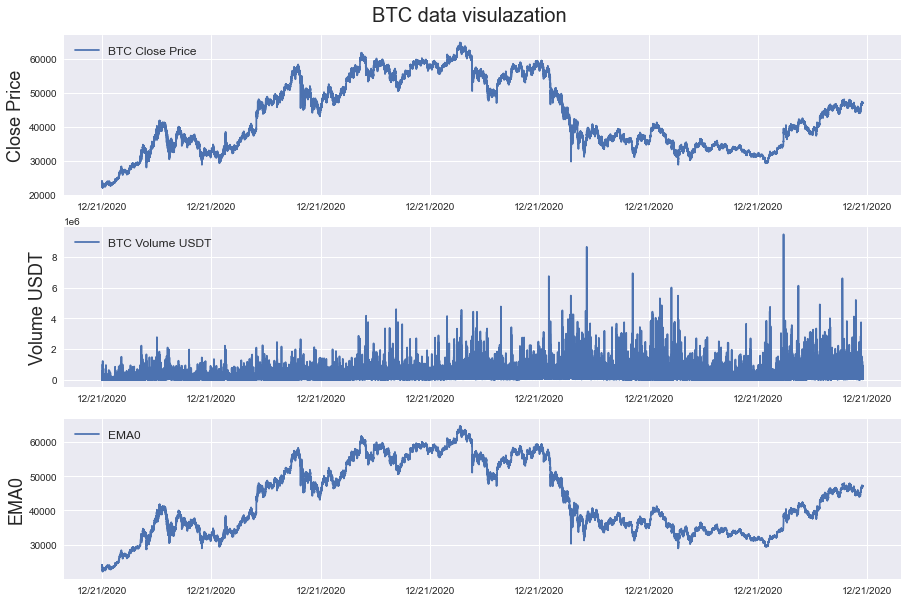

In [7]:
# visulaize the data of one crypto coin (e.g BTC)
df_BTC = CRYPTO_DICT["BTC"]["df"]

fig = plt.figure(figsize=(15,10))
st = fig.suptitle("BTC data visulazation", fontsize=20)
st.set_y(0.92)

ax1 = fig.add_subplot(311)
ax1.plot(df_BTC['close'], label='BTC Close Price')
ax1.set_xticklabels(df_BTC.date)
ax1.set_ylabel('Close Price', fontsize=18)
ax1.legend(loc="upper left", fontsize=12)

ax2 = fig.add_subplot(312)
ax2.plot(df_BTC['Volume USDT'], label='BTC Volume USDT')
ax2.set_xticklabels(df_BTC.date)
ax2.set_ylabel('Volume USDT', fontsize=18)
ax2.legend(loc="upper left", fontsize=12)

ax3 = fig.add_subplot(313)
ax3.plot(df_BTC['EMA0'], label='EMA0')
ax3.set_xticklabels(df_BTC.date)
ax3.set_ylabel('EMA0', fontsize=18)
ax3.legend(loc="upper left", fontsize=12)

In [8]:
# Applying pct_change to all dataframes 
for Crypto_code in CRYPTO_DICT:
    columns_avoid = ["date", "unix", "RSI", "symbol", "future_change", "Volume USDT", "upper_check", "lower_check"]
    CRYPTO_DICT[Crypto_code]["df"] = pct_change(CRYPTO_DICT[Crypto_code]["df"], columns_avoid)

In [9]:
CRYPTO_DICT["BTC"]["df"]

,unix,date,symbol,close,Volume USDT,mid_price_1,mid_price_2,EMA0,EMA1,EMA2,RSI,SMA,upper,lower,future_price,future_change,upper_check,lower_check
10,1608534120,12/21/2020,BTC/USDT,1.082550,10337.258494,0.848744,0.827821,0.462849,0.618952,0.156847,78.322581,0.204248,0.660608,-0.254182,-0.283693,1,1,0
14,1608534360,12/21/2020,BTC/USDT,1.360442,13705.641491,0.653030,0.598797,0.323718,-0.283888,-0.098135,86.302142,0.333172,0.647147,0.016929,0.470618,1,1,0
15,1608534420,12/21/2020,BTC/USDT,0.729306,22924.131231,0.781874,1.046747,0.397191,-0.326694,-0.024292,87.532068,0.364024,0.706655,0.018701,-0.957444,0,1,0
16,1608534480,12/21/2020,BTC/USDT,-0.079124,13724.695269,0.662511,0.389516,-0.280395,-0.120251,0.272547,86.646279,0.309307,0.616677,-0.000690,-1.083365,0,1,0
17,1608534540,12/21/2020,BTC/USDT,0.470618,33766.561525,0.039558,0.133258,-0.681767,-0.170500,-0.045567,88.266796,0.312766,0.637275,-0.014719,-0.433816,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347897,1629444420,08/20/2021,BTC/USDT,-0.076451,133184.447056,0.155044,-0.033979,-0.156717,-0.258869,-0.360742,50.584958,-0.060708,-0.082073,-0.039296,-0.646116,0,0,1
347898,1629444480,08/20/2021,BTC/USDT,-0.921735,132977.591814,-0.582916,-0.500139,-0.401378,-0.214723,-0.441883,44.861660,-0.114418,-0.023129,-0.205898,-0.353041,0,0,1
347899,1629444540,08/20/2021,BTC/USDT,0.184942,180183.705695,-0.349529,-0.367590,-0.377219,-0.383099,-0.321735,37.513998,-0.069847,0.023339,-0.163247,-0.093610,0,0,1
347900,1629444600,08/20/2021,BTC/USDT,-0.646116,126677.583573,-0.098838,-0.230625,-0.235468,-0.409913,-0.381391,30.049261,-0.102655,0.094244,-0.300041,-0.104258,0,0,1


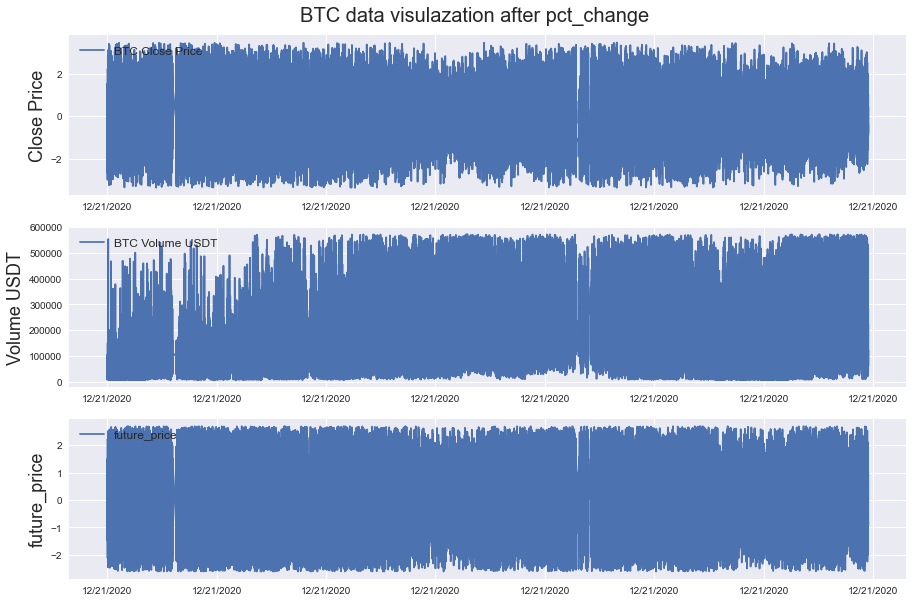

In [10]:
# visulaize the data of one crypto coin (e.g BTC)
df_BTC = CRYPTO_DICT["BTC"]["df"]

fig = plt.figure(figsize=(15,10))
st = fig.suptitle("BTC data visulazation after pct_change", fontsize=20)
st.set_y(0.92)

ax1 = fig.add_subplot(311)
ax1.plot(df_BTC['close'], label='BTC Close Price')
ax1.set_xticklabels(df_BTC.date)
ax1.set_ylabel('Close Price', fontsize=18)
ax1.legend(loc="upper left", fontsize=12)

ax2 = fig.add_subplot(312)
ax2.plot(df_BTC['Volume USDT'], label='BTC Volume USDT')
ax2.set_xticklabels(df_BTC.date)
ax2.set_ylabel('Volume USDT', fontsize=18)
ax2.legend(loc="upper left", fontsize=12)

ax3 = fig.add_subplot(313)
ax3.plot(df_BTC['future_price'], label='future_price')
ax3.set_xticklabels(df_BTC.date)
ax3.set_ylabel('future_price', fontsize=18)
ax3.legend(loc="upper left", fontsize=12)

### 2. Data scaling and hot_encoding ### 

In [11]:
# New columns index 
new_ind = ['unix', 'date', 'symbol', 'close', 'mid_price_1', 'mid_price_2', 'Volume USDT', 'SMA', 'EMA0', 'EMA1', 'EMA2', 'RSI', 'upper', 'lower', 'upper_check', 'lower_check',
       'future_price', 'future_change']

columns_to_scale = ['close', 'mid_price_1', 'mid_price_2', 'Volume USDT', 'SMA', 'EMA0', 'EMA1', 'EMA2', 'upper', 'lower', 'future_price']

# scale and split data 
for Crypto_code in CRYPTO_DICT:
    CRYPTO_DICT[Crypto_code]["df"], CRYPTO_DICT[Crypto_code]["df_train"], CRYPTO_DICT[Crypto_code]["df_val"], CRYPTO_DICT[Crypto_code]["df_test"]= preprocess_and_split_df(CRYPTO_DICT[Crypto_code]["df"], new_ind, columns_to_scale)

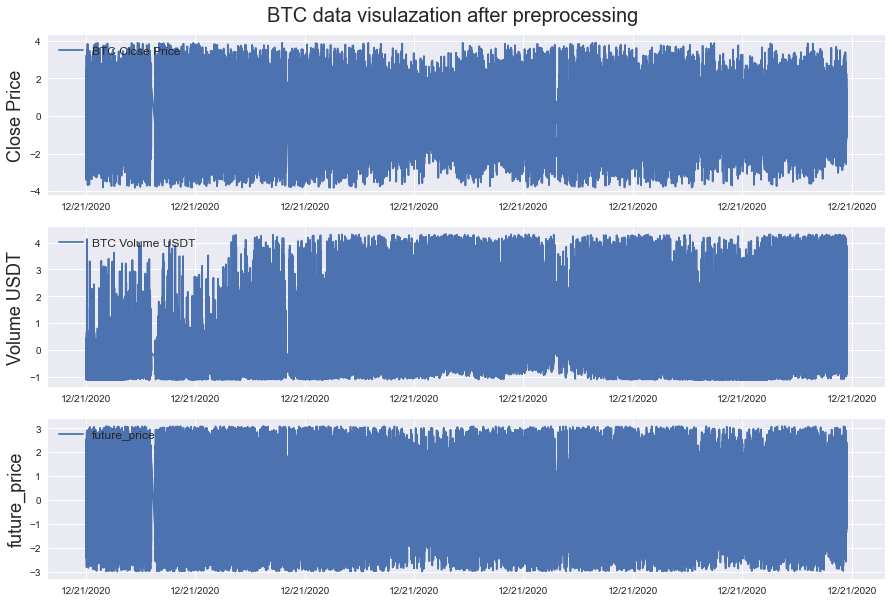

In [19]:
# visulaize the data of one crypto coin (e.g BTC)
df_BTC = CRYPTO_DICT["BTC"]["df"]

fig = plt.figure(figsize=(15,10))
st = fig.suptitle("BTC data visulazation after preprocessing", fontsize=20)
st.set_y(0.92)

ax1 = fig.add_subplot(311)
ax1.plot(df_BTC['close'], label='BTC Close Price')
ax1.set_xticklabels(df_BTC.date)
ax1.set_ylabel('Close Price', fontsize=18)
ax1.legend(loc="upper left", fontsize=12)

ax2 = fig.add_subplot(312)
ax2.plot(df_BTC['Volume USDT'], label='BTC Volume USDT')
ax2.set_xticklabels(df_BTC.date)
ax2.set_ylabel('Volume USDT', fontsize=18)
ax2.legend(loc="upper left", fontsize=12)

ax3 = fig.add_subplot(313)
ax3.plot(df_BTC['future_price'], label='future_price')
ax3.set_xticklabels(df_BTC.date)
ax3.set_ylabel('future_price', fontsize=18)
ax3.legend(loc="upper left", fontsize=12)

## Save all datafrmaes for training stage ## 

In [15]:
main_path = "Training_Data/Data_preprocessed/"
for Crypto_code in CRYPTO_DICT:
    print(f"{Crypto_code} saving process started")
    create_path = os.path.join(main_path, Crypto_code) 
    os.mkdir(create_path)
    CRYPTO_DICT[Crypto_code]["df"].to_pickle(f"Training_Data/Data_preprocessed/{Crypto_code}/{Crypto_code}-main_df.pkl")
    CRYPTO_DICT[Crypto_code]["df_train"].to_pickle(f"Training_Data/Data_preprocessed/{Crypto_code}/{Crypto_code}-train_df.pkl")
    CRYPTO_DICT[Crypto_code]["df_val"].to_pickle(f"Training_Data/Data_preprocessed/{Crypto_code}/{Crypto_code}-val_df.pkl")
    CRYPTO_DICT[Crypto_code]["df_test"].to_pickle(f"Training_Data/Data_preprocessed/{Crypto_code}//{Crypto_code}-test_df.pkl")
    
    print(f"{Crypto_code} saving process finished")
    

ADA saving process started
ADA saving process finished
BCH saving process started
BCH saving process finished
BNB saving process started
BNB saving process finished
BTC saving process started
BTC saving process finished
ETH saving process started
ETH saving process finished
LTC saving process started
LTC saving process finished
NEO saving process started
NEO saving process finished
TRX saving process started
TRX saving process finished
XRP saving process started
XRP saving process finished
